In [2]:
# Importing input file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
input_data=pd.read_csv('Add_sales_data_2018.csv')
input_data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
input_data.shape

(205, 7)

In [7]:
input_data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [8]:
#1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
input_data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [10]:
#Median
input_data.median()

Add1(in Thousands)       269.700
Add2(in Thousands)       274.200
Add3(in Thousands)       263.250
Add4(in Thousands)       268.900
Add5(in Thousands)       268.350
Profit(in Thousands)    5088.455
dtype: float64

In [11]:
#Sum of attributes
input_data.sum()

Date                    2018-10-082018-10-052018-10-042018-10-032018-1...
Add1(in Thousands)                                                54853.4
Add2(in Thousands)                                                55703.1
Add3(in Thousands)                                                53913.1
Add4(in Thousands)                                                54780.9
Add5(in Thousands)                                                54766.3
Profit(in Thousands)                                          1.03722e+06
dtype: object

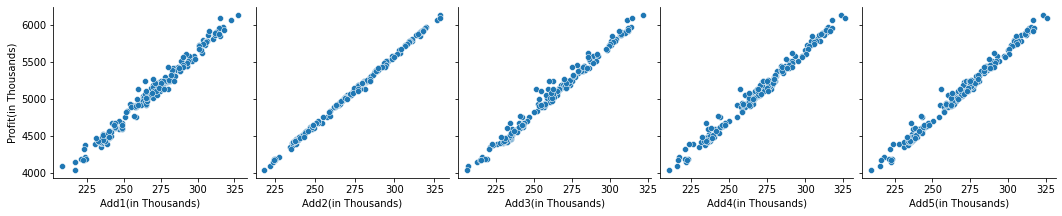

In [13]:
#Graph
sns.pairplot(input_data, x_vars=['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'], y_vars='Profit(in Thousands)', height=3, aspect=1, kind='scatter')
plt.show()

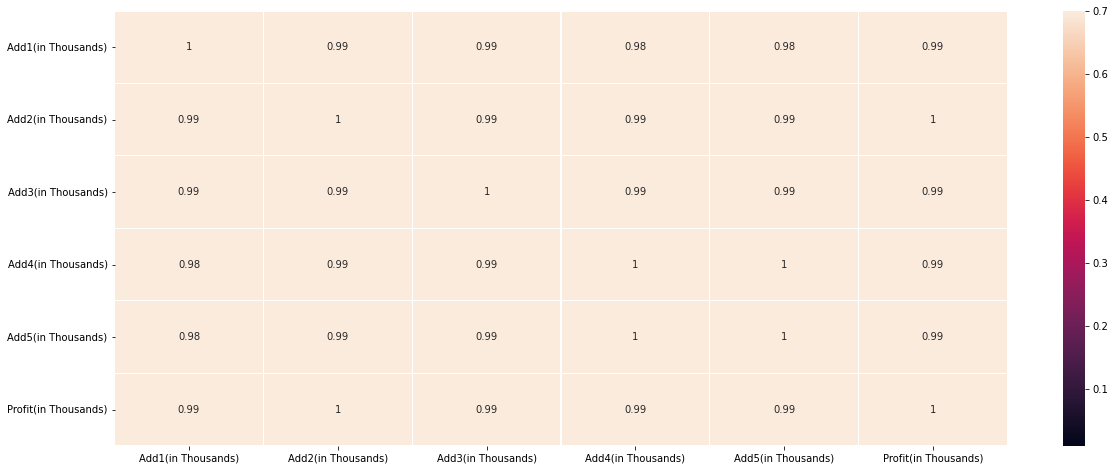

In [14]:
#2. Build a regression model to predict the profit from the given data and comment your findings on it.
corrmatrix = input_data.corr()
plt.subplots(figsize = (20,8));
sns.heatmap(corrmatrix, vmin = 0.01, vmax=0.7, annot = True, linewidth = 0.2);

In [15]:
X = input_data['Add2(in Thousands)']
y = input_data['Profit(in Thousands)']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [17]:
X_train.head()

3      237.50
157    282.75
81     269.35
32     244.50
99     259.50
Name: Add2(in Thousands), dtype: float64

In [18]:
y_train.head()

3      4391.665
157    5263.935
81     5027.633
32     4566.310
99     4772.520
Name: Profit(in Thousands), dtype: float64

In [19]:
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                -45.670847
Add2(in Thousands)    18.787220
dtype: float64

In [22]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     Profit(in Thousands)   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 9.694e+04
Date:                  Thu, 09 Dec 2021   Prob (F-statistic):          6.36e-227
Time:                          09:19:23   Log-Likelihood:                -726.74
No. Observations:                   164   AIC:                             1457.
Df Residuals:                       162   BIC:                             1464.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

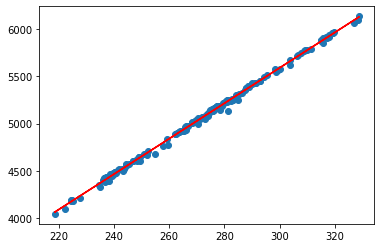

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, (-45.670847)+ 18.787220 *X_train, 'r')
plt.show()

In [24]:
#3) Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1 = 290
Profit=(-45.670847)+ 18.787220 * Add1
print("When the amount spend for adverstisement is", Add1,"The profit generated by the company is ",Profit)

When the amount spend for adverstisement is 290 The profit generated by the company is  5402.622953


In [25]:
Add = 312
Profit=(-45.670847)+ 18.787220 * Add
print("When the amount spend for adverstisement is", Add,"The profit generated by the company is ",Profit)

When the amount spend for adverstisement is 312 The profit generated by the company is  5815.941793


In [26]:
Add = 309
Profit=(-45.670847)+ 18.787220 * Add
print("When the amount spend for adverstisement is", Add,"The profit generated by the company is ",Profit)

When the amount spend for adverstisement is 309 The profit generated by the company is  5759.580133


In [27]:
Add = 298
Profit=(-45.670847)+ 18.787220 * Add
print("When the amount spend for adverstisement is", Add,"The profit generated by the company is ",Profit)

When the amount spend for adverstisement is 298 The profit generated by the company is  5552.920713


In [28]:
Add = 320
Profit=(-45.670847)+ 18.787220 * Add
print("When the amount spend for adverstisement is", Add,"The profit generated by the company is ",Profit)

When the amount spend for adverstisement is 320 The profit generated by the company is  5966.239553
